# Pymaceuticals Inc.
---

Analysis

By removing duplicates the total nummber of mice with tumor is 248. The total count of mice by gendThis aer showed that 49% were female mice and 51% were male mice.
The correlation between the weight of the mouse and the average tumor volume is 0.84. So when the mouse weight increases the average volume increases.
Based on the various treatments, Capomulin and Ramicane had helped reduce the size of tumors more than the other treatments.
The regression analysis had shown how much the average tumor volume will change when weight of mice changes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [2]:
# Study data files
MOUSE_METADATA_PATH = "data/Mouse_metadata.csv"
STUDY_RESULTS_PATH = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(MOUSE_METADATA_PATH)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results = pd.read_csv(STUDY_RESULTS_PATH)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
print(mouse_results.shape)
mouse_results.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Read the mouse data
df_mouse_metadata = pd.read_csv(MOUSE_METADATA_PATH)
df_mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
# Read the study_results
df_study_results = pd.read_csv(STUDY_RESULTS_PATH)
df_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single DataFrame
merged_df = pd.merge(df_mouse_metadata, df_study_results)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
mouse_count = mouse_results ["Mouse ID"].nunique()
mouse_count

249

In [10]:
# Our data should be uniqyuely identified by HOuse ID and Timepoint
# Get the duplicate mice by ID nymber that shows up for Mouse ID
dupe_mouse = mouse_results[mouse_results.duplicated(subset=["Mouse ID" , "Timepoint"], keep=False)]
dupe_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.loc[mouse_results["Mouse ID"]!="g989"]
clean_mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [13]:
#Checking the number of mice in the clean Dataframe
clean_mouse_results["Mouse ID"].nunique()
clean_mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
clean_mouse_results

Tumor_Summary = pd.DataFrame({"Mean": mean_tumor,
                              "Median": median_tumor,
                              "Var":var_tumor,
                              "Std":std_tumor,
                              "Sem":sem_tumor})
Tumor_Summary


,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

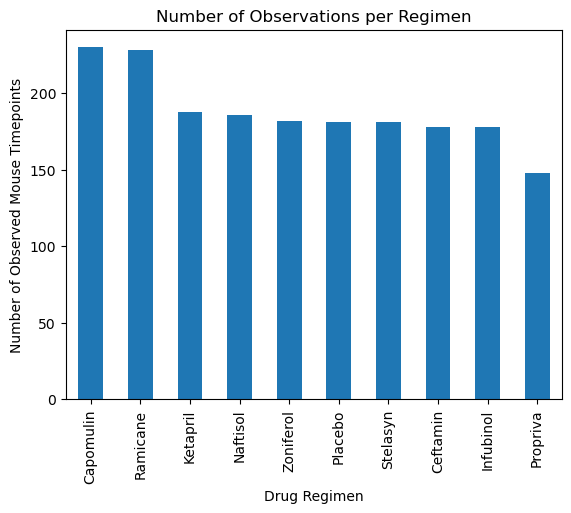

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_group = clean_mouse_results.groupby("Drug Regimen")
timepoint = drug_group["Timepoint"].count().sort_values(ascending=False)
timepoint.plot(kind="bar")

plt.title("Number of Observations per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

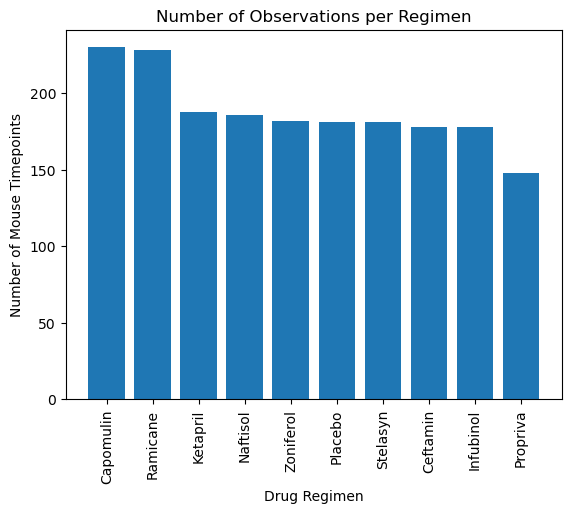

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=timepoint.index, height=timepoint.values)
plt.title("Number of Observations per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

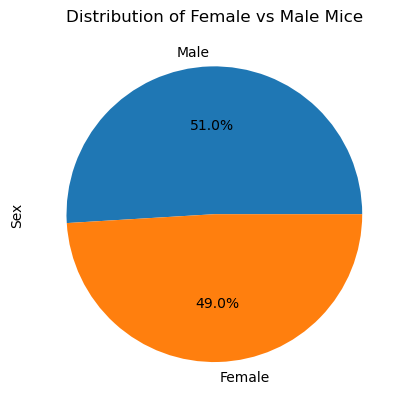

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mouse_results["Sex"].value_counts()
plt.title("Distribution of Female vs Male Mice") 
gender_data.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

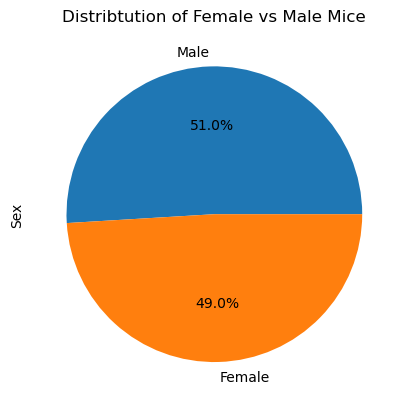

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plot = gender_data.plot.pie(autopct="%1.1f%%")
plt.title("Distribtution of Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubunol", "Ceftamin"]
drug_values = []

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df =clean_mouse_results.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_mouse_results, max_tp_df, on=["Mouse ID", "Timepoint"],how="right")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:

    #Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]

    #add subset
    tumor_vol_list.append(final_tumor_vol)

    #Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    outliers = (final_tumor_vol[(final_tumor_vol> upper_bound) | 
                                         (final_tumor_vol < lower_bound)])
    print(f" {drug} outliers: {outliers}")

        

 Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


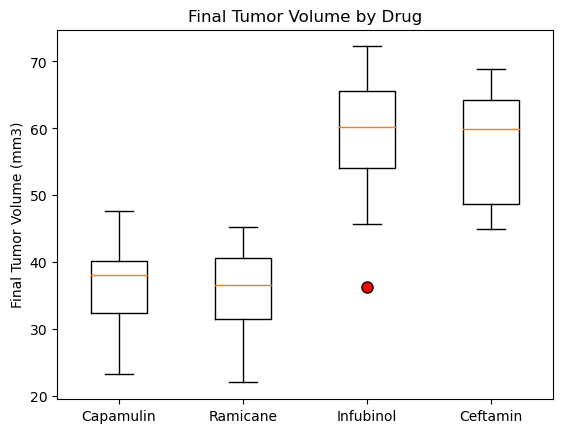

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops=dict(marker="o", markerfacecolor="r", markersize=8, markeredgecolor="black")

plt.boxplot(tumor_vol_list, flierprops=flierprops)

plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capamulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

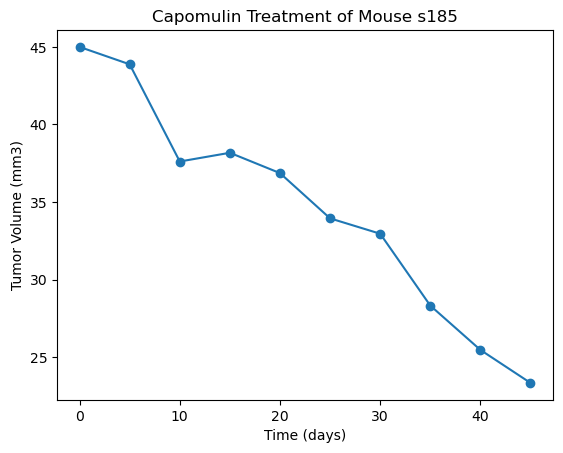

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = clean_mouse_results.loc[clean_mouse_results["Mouse ID"] == "s185"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker = "o")

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185") 
plt.show()       

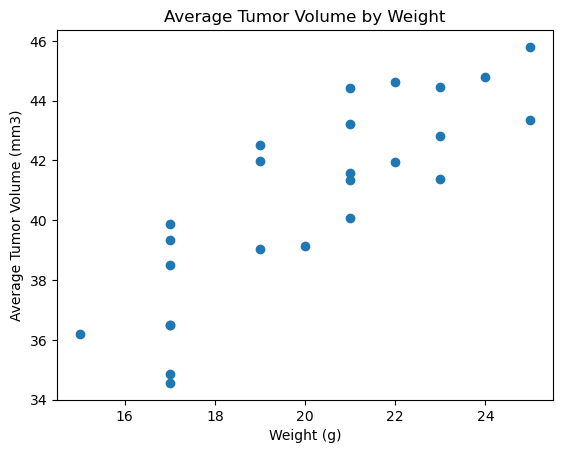

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df=clean_mouse_results.loc[clean_mouse_results["Drug Regimen"]=="Capomulin"]

capomulin_average = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()

## Correlation and Regression

c:\Users\Lepasana\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


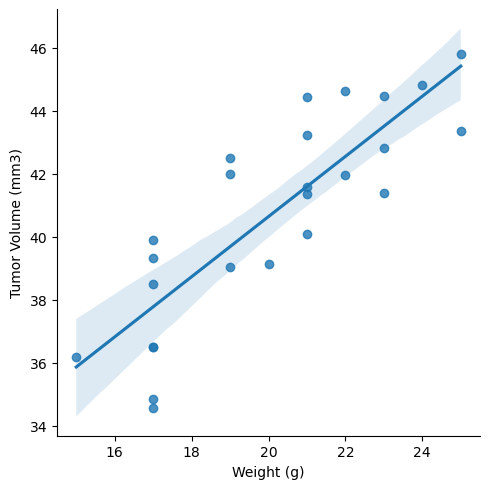

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
coefficient = sns.lmplot(x="Weight (g)", y="Tumor Volume (mm3)", data=capomulin_average,fit_reg=True)
plt.show()